In [191]:
import pandas as pd
import numpy as np
import seaborn as sns
color = sns.color_palette()
from scipy import stats
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt 
from mlxtend.frequent_patterns import apriori
from apyori import apriori

In [192]:
dataset = pd.read_csv('E:/JS_Sir/association rule/store_data.csv', header= None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)  
# association_rules = apriori(records, min_lift=3, min_length=2) 
association_results = list(association_rules)

In [194]:
print(len(association_results))

48


In [195]:
print(association_results[0])
type(association_results)

RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)])


list

In [196]:
df = pd.DataFrame(association_results)
print(len(df))
df.to_csv('E:/JS_Sir/association rule/for_plots.csv', encoding='utf-8')

48


PermissionError: [Errno 13] Permission denied: 'E:/JS_Sir/association rule/for_plots.csv'

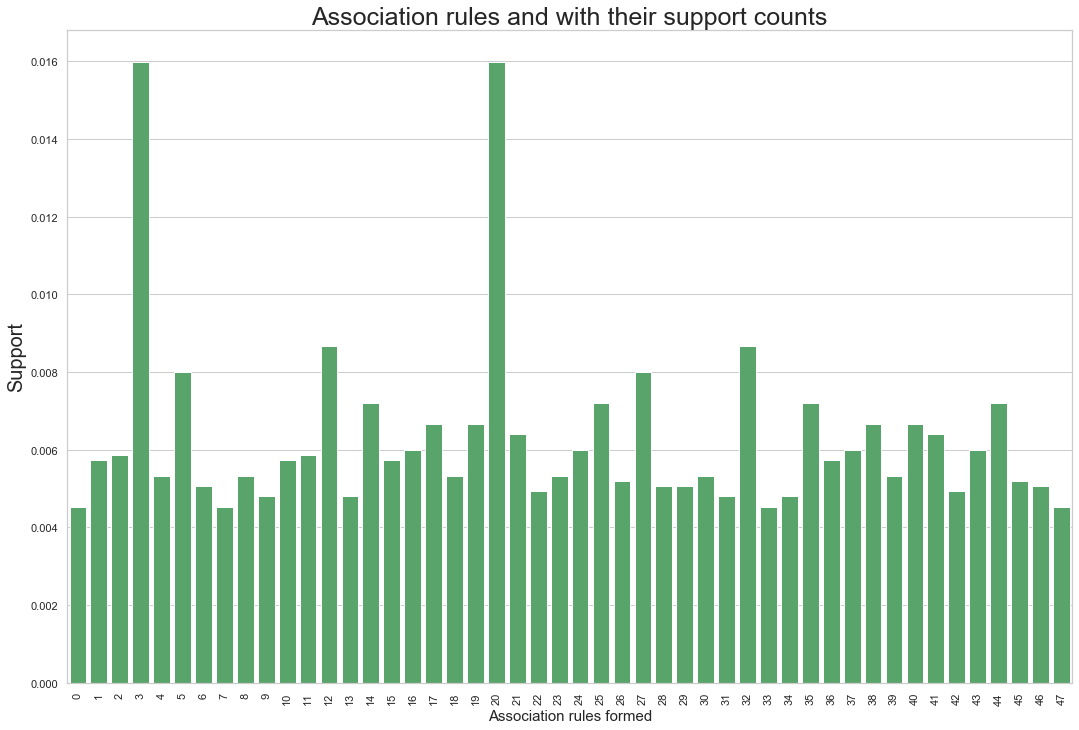

In [197]:
plots = pd.read_csv('E:/JS_Sir/association rule/for_plots.csv')
plt.figure(figsize=(18,12))
sns.set(style="whitegrid")
#sns.countplot(x="items", data=plots, color=color[0])
ax = sns.barplot(x="association_rules", y="support", data=plots, color="g", saturation=.9)
plt.ylabel('Support', fontsize=20)
plt.xlabel('Association rules formed', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Association rules and with their support counts", fontsize=25)
plt.show()

In [198]:
type(plots)

pandas.core.frame.DataFrame

In [199]:
d={}
d_2={}
d_3 ={}
df_conf = pd.DataFrame (d)
df_lift = pd.DataFrame (d_2)
df_items= pd.DataFrame(d_3)

In [200]:
for item in association_results:

    # first index of the inner list
    # Contains base item and add item
    pair = item[0] 
    items = [x for x in pair]
    print("Rule: " + str(list(item.ordered_statistics[0].items_base)) + " -> " + str(list(item.ordered_statistics[0].items_add)))

    #second index of the inner list
    print("Support: " + str(item[1]))

    #third index of the list located at 0th
    #of the third index of the inner list
    
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: ['light cream'] -> ['chicken']
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395
Rule: ['mushroom cream sauce'] -> ['escalope']
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: ['pasta'] -> ['escalope']
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: ['herb & pepper'] -> ['ground beef']
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: ['tomato sauce'] -> ['ground beef']
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: ['whole wheat pasta'] -> ['olive oil']
Support: 0.007998933475536596
Confidence: 0.2714932126696833
Lift: 4.122410097642296
Rule: ['pasta'] -> ['shrimp']
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896
Rule: ['light cream'] -> ['chicken', 'nan']
Support: 0.004532728969470737
Confidence: 0.29059829059829057
Lift: 4.84395061728395

In [201]:
for item in association_results:
    temp = pd.DataFrame(
        {
            str(item[2][0][2])
        }
    )
    df_conf = pd.concat([df_conf, temp])
#df_conf= df_conf+(str(item[2][0][2]))

In [202]:
print(df_conf)

                     0
0  0.29059829059829057
0   0.3006993006993007
0   0.3728813559322034
0   0.3234501347708895
0   0.3773584905660377
0   0.2714932126696833
0   0.3220338983050847
0  0.29059829059829057
0  0.23255813953488375
0   0.5714285714285714
0   0.3006993006993007
0   0.3728813559322034
0  0.31100478468899523
0  0.20338983050847456
0  0.30508474576271183
0  0.20574162679425836
0  0.21531100478468898
0  0.23923444976076558
0   0.3225806451612903
0  0.39062500000000006
0   0.3234501347708895
0   0.3934426229508197
0  0.22424242424242427
0   0.3773584905660377
0   0.5232558139534884
0  0.20300751879699247
0  0.22543352601156072
0   0.2714932126696833
0   0.3220338983050847
0  0.20105820105820105
0  0.23255813953488375
0   0.5714285714285714
0  0.31100478468899523
0  0.28813559322033894
0  0.20338983050847456
0  0.30508474576271183
0  0.20574162679425836
0  0.21531100478468898
0  0.23923444976076558
0   0.3225806451612903
0  0.39062500000000006
0   0.3934426229508197
0  0.224242

In [203]:
for item in association_results:
    temp = pd.DataFrame(
        {
            str(item[2][0][3])
        }
    )
    df_lift = pd.concat([df_lift, temp])

In [204]:
print(df_lift)

                    0
0    4.84395061728395
0   3.790832696715049
0   4.700811850163794
0  3.2919938411349285
0   3.840659481324083
0   4.122410097642296
0   4.506672147735896
0    4.84395061728395
0  3.2545123221103784
0  3.2819951870487856
0   3.790832696715049
0   4.700811850163794
0   3.165328208890303
0   3.088314005352364
0   3.200616332819722
0  3.1240241752707125
0  3.0131489680782684
0  3.4980460188216425
0   3.283144395325426
0   3.975682666214383
0  3.2919938411349285
0   4.004359721511667
0    3.40494417862839
0   3.840659481324083
0   3.005315360233627
0  3.0825089038385434
0  3.4230301186492245
0    4.13077198425009
0   4.515095833993347
0  3.0529100529100526
0   3.260595522712454
0  3.2819951870487856
0   3.165328208890303
0  3.0228043143297376
0   3.094578333963626
0   3.200616332819722
0  3.1303609383037156
0  3.0187810222242093
0  3.4980460188216425
0   3.283144395325426
0   3.975682666214383
0   4.004359721511667
0  3.4118507591124225
0   3.005315360233627
0   3.0887

In [205]:
print(plots)
type(plots)
col_one = plots.loc[ : , 'association_rules' ]

    association_rules                                              items  \
0                   0              frozenset({'chicken', 'light cream'})   
1                   1    frozenset({'mushroom cream sauce', 'escalope'})   
2                   2                   frozenset({'pasta', 'escalope'})   
3                   3        frozenset({'herb & pepper', 'ground beef'})   
4                   4         frozenset({'tomato sauce', 'ground beef'})   
5                   5      frozenset({'whole wheat pasta', 'olive oil'})   
6                   6                     frozenset({'pasta', 'shrimp'})   
7                   7       frozenset({'chicken', 'nan', 'light cream'})   
8                   8  frozenset({'frozen vegetables', 'chocolate', '...   
9                   9  frozenset({'cooking oil', 'ground beef', 'spag...   
10                 10  frozenset({'mushroom cream sauce', 'nan', 'esc...   
11                 11            frozenset({'pasta', 'nan', 'escalope'})   
12          

In [206]:
from pandas import Series, DataFrame
#print(col_one)

col_one_df=pd.DataFrame(col_one)
type(col_one_df)

pandas.core.frame.DataFrame

In [211]:
#df.to_csv('E:/JS_Sir/association rule/combined.csv', encoding='utf-8
print(len(df_conf))
print(len(df_lift))
print(len(col_one_df))

48
48
48


In [220]:
df_conf.columns = ['confidence']
print(df_conf)
df_lift.columns = ['lift']
print(df_lift)
print(col_one_df)

            confidence
0  0.29059829059829057
0   0.3006993006993007
0   0.3728813559322034
0   0.3234501347708895
0   0.3773584905660377
0   0.2714932126696833
0   0.3220338983050847
0  0.29059829059829057
0  0.23255813953488375
0   0.5714285714285714
0   0.3006993006993007
0   0.3728813559322034
0  0.31100478468899523
0  0.20338983050847456
0  0.30508474576271183
0  0.20574162679425836
0  0.21531100478468898
0  0.23923444976076558
0   0.3225806451612903
0  0.39062500000000006
0   0.3234501347708895
0   0.3934426229508197
0  0.22424242424242427
0   0.3773584905660377
0   0.5232558139534884
0  0.20300751879699247
0  0.22543352601156072
0   0.2714932126696833
0   0.3220338983050847
0  0.20105820105820105
0  0.23255813953488375
0   0.5714285714285714
0  0.31100478468899523
0  0.28813559322033894
0  0.20338983050847456
0  0.30508474576271183
0  0.20574162679425836
0  0.21531100478468898
0  0.23923444976076558
0   0.3225806451612903
0  0.39062500000000006
0   0.3934426229508197
0  0.224242

In [227]:
#df_plot_conf= {}
#frames = [col_one_df, df_conf, df_lift]
result = pd.concat([col_one_df,df_conf, df_lift])
print(result)
#result = col_one_df.append([df_conf, df_lift], axis=1)

    association_rules confidence                lift
0                 0.0        NaN                 NaN
1                 1.0        NaN                 NaN
2                 2.0        NaN                 NaN
3                 3.0        NaN                 NaN
4                 4.0        NaN                 NaN
..                ...        ...                 ...
0                 NaN        NaN   3.005315360233627
0                 NaN        NaN   3.088761457396025
0                 NaN        NaN   3.429973384609973
0                 NaN        NaN  3.0591025682303568
0                 NaN        NaN  3.0228043143297376

[144 rows x 3 columns]


In [229]:
result.to_csv('E:/JS_Sir/association rule/combined.csv', encoding='utf-8')

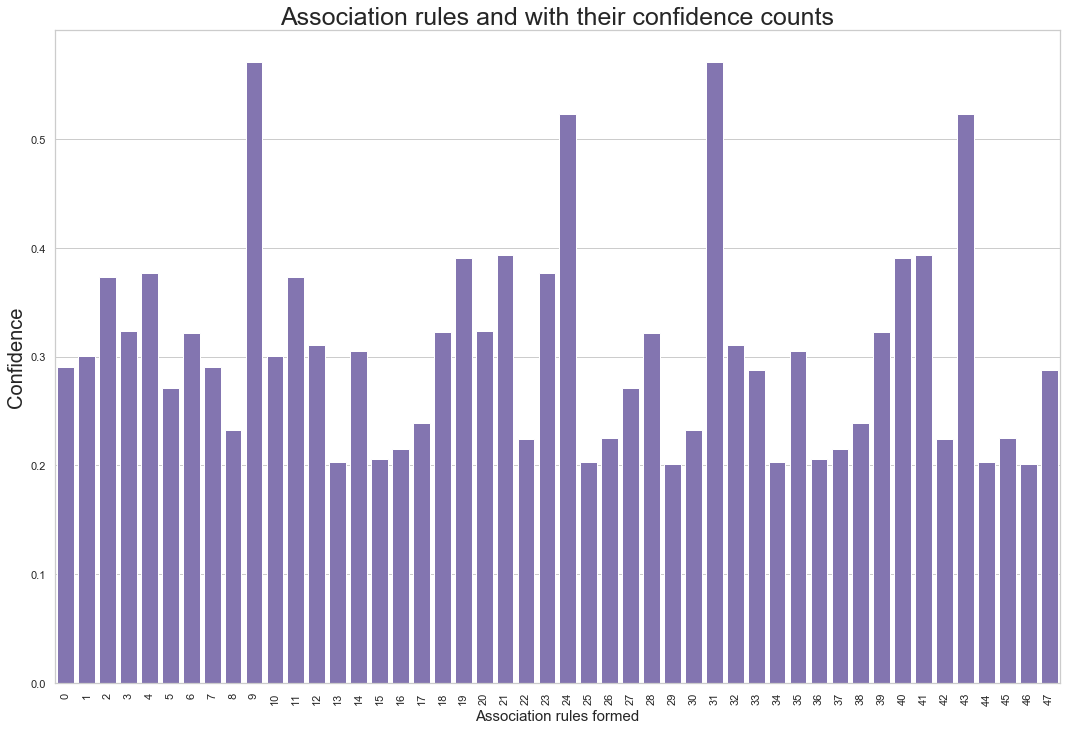

In [235]:
plots = pd.read_csv('E:/JS_Sir/association rule/combined.csv')
plt.figure(figsize=(18,12))
sns.set(style="whitegrid")
#sns.countplot(x="items", data=plots, color=color[0])
ax = sns.barplot(x="association_rules", y="confidence", data=plots, color="m", saturation=.9)
plt.ylabel('Confidence', fontsize=20)
plt.xlabel('Association rules formed', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Association rules and with their confidence counts", fontsize=25)
plt.show()

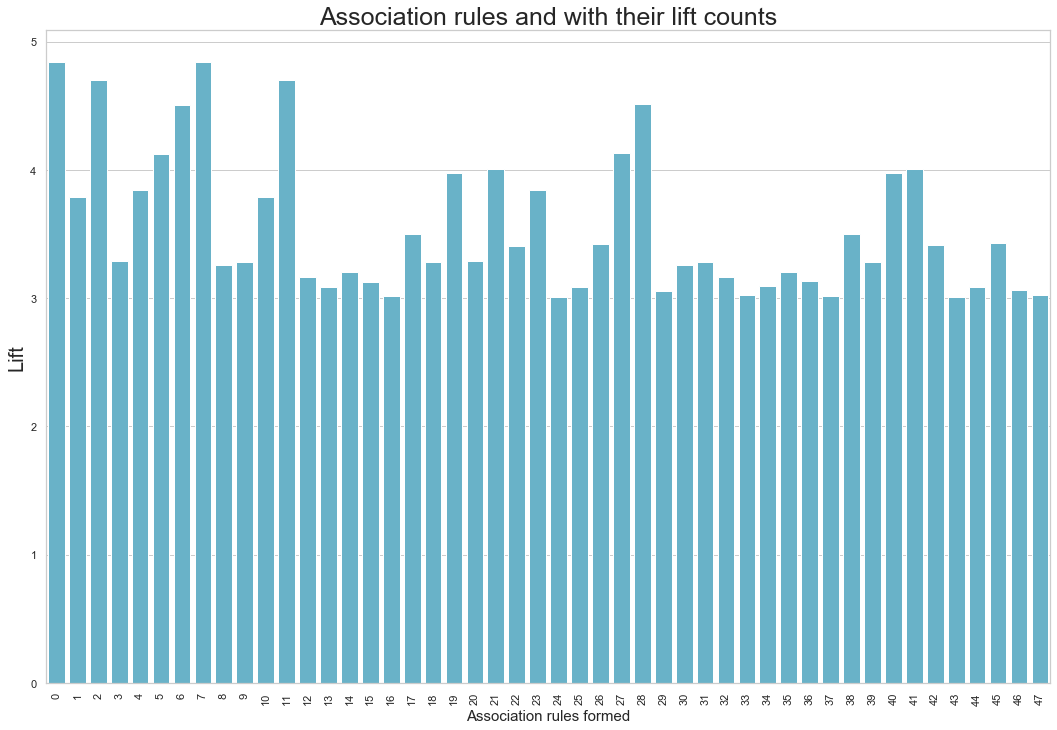

In [237]:
plots = pd.read_csv('E:/JS_Sir/association rule/combined.csv')
plt.figure(figsize=(18,12))
sns.set(style="whitegrid")
#sns.countplot(x="items", data=plots, color=color[0])
ax = sns.barplot(x="association_rules", y="lift", data=plots, color="c", saturation=.9)
plt.ylabel('Lift', fontsize=20)
plt.xlabel('Association rules formed', fontsize=15)
plt.xticks(rotation='vertical')
plt.title("Association rules and with their lift counts", fontsize=25)
plt.show()

In [241]:
plots = pd.read_csv('E:/JS_Sir/association rule/combined.csv')
new_df=plots.sort_values(by='lift', ascending=False)
print(new_df)
result.to_csv('E:/JS_Sir/association rule/sorted_lift.csv', encoding='utf-8')

    Unnamed: 0  association_rules  confidence      lift
0            0                  0    0.290598  4.843951
7            7                  7    0.290598  4.843951
11          11                 11    0.372881  4.700812
2            2                  2    0.372881  4.700812
28          28                 28    0.322034  4.515096
6            6                  6    0.322034  4.506672
27          27                 27    0.271493  4.130772
5            5                  5    0.271493  4.122410
21          21                 21    0.393443  4.004360
41          41                 41    0.393443  4.004360
19          19                 19    0.390625  3.975683
40          40                 40    0.390625  3.975683
23          23                 23    0.377358  3.840659
4            4                  4    0.377358  3.840659
10          10                 10    0.300699  3.790833
1            1                  1    0.300699  3.790833
38          38                 38    0.239234  3

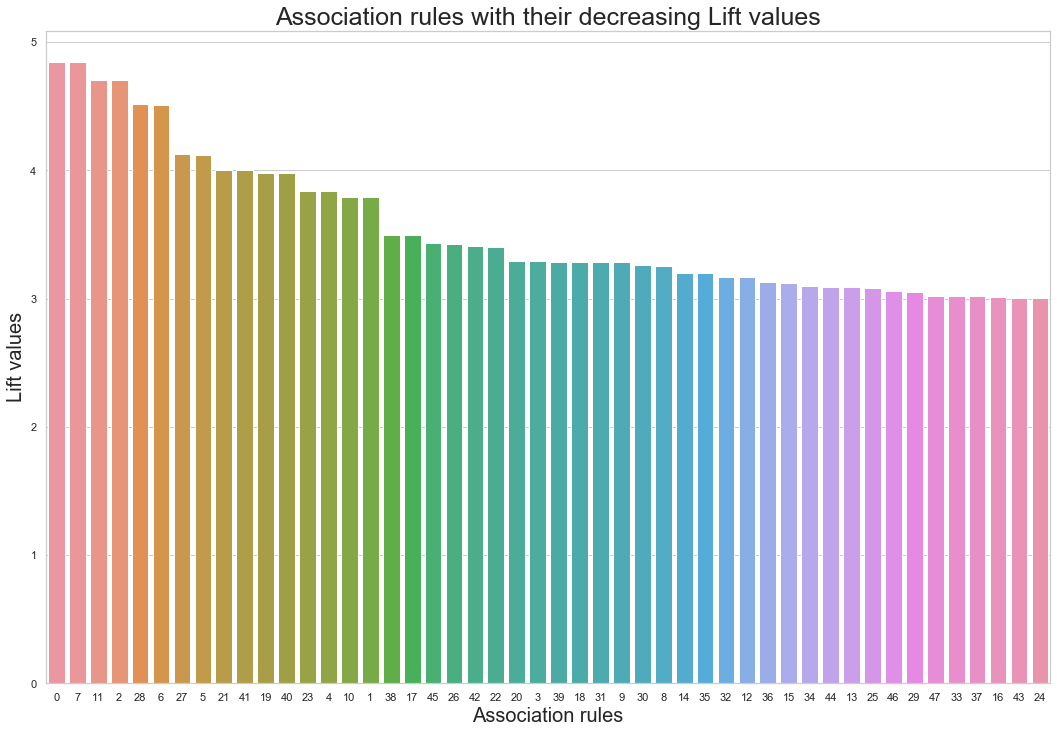

In [264]:
plt.figure(figsize=(18,12))
result = plots.groupby(["association_rules"])['lift'].aggregate(np.median).reset_index().sort_values('lift',ascending=False)
# pd_df = pd_df.sort_values('Count',ascending=False).reset_index()
sns.barplot(x='association_rules', y="lift", data=plots, order=result['association_rules'])
plt.ylabel('Lift values', fontsize=20)
plt.xlabel('Association rules', fontsize=20)
plt.title("Association rules with their decreasing Lift values", fontsize=25)
plt.show()